# Waymo Motion Detection - Tutorial 1

침착하게 차근차근,,,

### INDEX

1. [환경구축](#1.-환경구축)
2. [데이터셋 로드](#2.-데이터셋-로드)
3. [데이터셋 구조](#3.-데이터셋-구조)
4. [기본요소 시각화](#4.-기본요소-시각화)


-----

# 1. 환경구축
- 1-1. Anaconda 설치 및 환경 구축
- 1-2. waymo_open_dataset 패키지 설치
---

## Anaconda 설치 및 환경 구축
```bash
$ wget https://repo.anaconda.com/archive/Anaconda3-2022.05-Linux-x86_64.sh
$ chmod +x Anaconda3-2022.05-Linux-x86_64.sh
```
위 스크립트를 실행하면 약관동의 및 각종 정보를 입력하는 추가 과정이 있는데 검색하면 쉽게 찾아볼 수 있다. 설치가 완료되면 `waymo`라는 이름의 python 가상환경을 구성한다.

```bash
$ conda create --name waymo python=3.7
$ conda activate waymo
$ pip install notebook
$ conda install pytorch==1.7.1 torchvision==0.8.2 torchaudio==0.7.2 cudatoolkit=10.1 -c pytorch
```
`activate`를 통해 가상환경을 활성화하고, 개발에 필요한 각종 라이브러리를 설치한다.

## waymo_open_dataset 패키지 설치

데이터셋을 다루기 위해 waymo에서 만든 `waymo_open_dataset` 패키지를 설치해야한다.자세한 튜토리얼은 [여기](https://github.com/waymo-research/waymo-open-dataset/blob/master/tutorial/tutorial.ipynb) 를 참고하면 된다

```bash
$ pip install --upgrade pip
$ python -m pip reinstall waymo-open-dataset-tf-2-6-0
```

다른 라이브러리와 의존성 문제가 있어서 버전을 맞춰주어야 했는데 아래와 같이 맞추면 된다.
```bash
$ pip install keras==2.6.0
$ pip install tensorflow==2.6.0
```


# 2. 데이터셋 로드
---
- 2-1. 데이터셋 파일 읽기
- 2-2. 시나리오 구조로 하나의 데이터만 읽어보기

## 데이터셋 파일 읽기

In [1]:
import os

dataset_dir = "../../../dataset/waymo-dataset/validation/"

dataset_fnames = os.listdir(dataset_dir)
dataset_paths  = sorted([os.path.join(dataset_dir, fname) for fname in dataset_fnames])

데이터셋은 기본적으로 양이 많기 때문에 `TFRecordDataset()` 메소드를 이용하여 동적으로 로드한다. 일단 데이터셋 구조 파악이 필요하기 때문에 모든 데이터셋을 사용하지 않고 일부분만 이용하여 시각화를 해보고자 한다.

In [2]:
import tensorflow as tf

dataset = tf.data.TFRecordDataset(dataset_paths[0])
dataset

2022-08-30 08:52:08.110860: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-30 08:52:08.116649: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-30 08:52:08.116769: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-30 08:52:08.117594: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

<TFRecordDatasetV2 shapes: (), types: tf.string>

In [3]:
for num_data, data in enumerate(dataset):
    pass

num_data

2022-08-30 08:52:08.504624: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


269

첫 번째 파일을 읽으면, 총 269개의 시나리오 데이터가 내포되어있음을 알 수 있다.

## 시나리오 구조로 하나의 데이터만 읽어보기

`data`는 serialized 상태이기 때문에 단순 출력으로는 데이터를 이해하기 어렵다. `.proto` 라는 파일에 정의된 구조에 맞게 해석해야 본연의 데이터를 쉽게 읽을 수 있는데, 이를 위해 `waymo_open_dataset` 패키지를 설치해야하는 것이다.

In [4]:
from waymo_open_dataset.protos import scenario_pb2

for data in dataset:
    proto_string = data.numpy()
    scenario = scenario_pb2.Scenario()
    scenario.ParseFromString(proto_string)
    break

scenario.scenario_id # 시나리오의 ID 값만 출력

'637f20cafde22ff8'

⚠️ 하나의 `scenario` 객체에 너무 많은 데이터가 있어서 `scenario`만 단일로 출력할 경우 해당 코드 실행으로 인해 오랜 시간을 기다려야할 수 있으니 시나리오의 ID를 담고있는 `scenario_id` 필드만 출력하는 것을 권장합니다


# 3. 데이터셋 구조
- 3-1. scenario.proto
    - message ObjectState
    - message Track
    - message DynamicMapState
    - message RequiredPrediction
    - message Scenario
- 3-2. map.proto
    - message Map
    - message DynamicState
    - message TrafficSignalLaneState
    - message MapFeature
    - message MapPoint
    - message BoundarySegment
    - message LaneNeighbor
    - message LaneCenter
    - message RoadEdge
    - message RoadLine
    - message StopSign
    - message Crosswalk
    - message SpeedBump
---


Waymo Opendata시나리오가 어떤 구조로 이루어져있는지 확인하고자 한다. 우선 Waymo Open Dataset(이하 waymo od) 홈페이지에 들어가면 Data 라는 메뉴가 있는데, 이 메뉴 안에 데이터셋 구조에 대한 설명이 되어있다. [Motion Data 페이지](https://waymo.com/intl/en_us/open/data/motion/)를 보면 다음과 같은 문구가 있다.

```
The motion dataset is provided as sharded TFRecord format files containing protocol buffer data.
```

즉, 데이터셋 파일은 `TFRecord` 형태로 구성된 파일이며, 내부적으로는 `protocol buffer data`가 존재한다고 한다. 여기서 말하는 `protocol buffer data`는 구글에서 제작한 [protobuf 라이브러리](https://developers.google.com/protocol-buffers)를 사용해서 다룰 수 있으며, 알아보니 데이터 구조를 `.proto` 파일에 정의해서 사용하는 방식이라고 한다.

이러한 방식을 굳이 사용해서 일을 복잡하게 만드는 이유는 데이터셋이 워낙 방대해지다보니 이를 효율적으로 저장할 방법에 대해 탐구하게 되었고, 그 방법으로 protocol buffer를 이용하여 데이터를 구조화하고, `저장 시 구조화된 데이터를 직렬화하여 저장` 할 수 있도록 하는 것이 개발된 것. Waymo에서 제공한 Dataset 크기가 TB단위였기 때문에 직접적으로 그 방대함을 체감할 수 있었다.

따라서 waymo od 측에서 공개한 데이터셋의 `.proto` 파일을 기반으로 데이터셋을 분석하고 개발해나가야 한다. 해당 파일은 Motion Data 페이지 내에 링크로 걸려있다. 아래는 해당 링크에 있는 proto 구조를 읽어보며 번역 및 분석한 내용이다.

## scenario.proto

https://github.com/waymo-research/waymo-open-dataset/blob/master/waymo_open_dataset/protos/scenario.proto

- message ObjectState
- message Track
- message DynamicMapState
- message RequiredPrediction
- message Scenario


### message ObjectState

```c++
message ObjectState {
    // 객체 바운딩 박스의 중심 좌표
    optional double     center_x = 2;
    optional double     center_y = 3;
    optional double     center_z = 4;

    // 객체 바운딩 박스의 크기
    optional float      length = 5;
    optional float      width = 6;
    optional float      height = 7;

    // 바운딩박스의 진행 방향을 나타냄. [-pi, pi]로 정규화됨.
    optional float      heading = 8;

    // 속도 벡터(m/s). 헤딩과 약간 다를 수 있다고 함.
    optional float      velocity_x = 9;
    optional float      velocity_y = 10;

    // 상태 데이터가 잘못되었거나 없으면 False.
    optional bool       valid = 11;
}
```

### message Track

```c++
message Track {
    enum ObjectType {
        TYPE_UNSET = 0;  // 이 타입은 오류를 뜻함.
        TYPE_VEHICLE = 1;
        TYPE_PEDESTRIAN = 2;
        TYPE_CYCLIST = 3;
        TYPE_OTHER = 4;
    }

    // 객체 고유 ID
    optional int32           id = 1;

    // 객체 유형. (위 enum 참고)
    optional ObjectType      object_type = 2;

    // 객체의 상태정보
    repeated ObjectState     states = 3;
}
```

### message DynamicMapState

```c++
// The dynamic map information at a single time step.
message DynamicMapState {
    // The traffic signal states for all observed signals at this time step.
    repeated TrafficSignalLaneState lane_states = 1;
}
```

### message RequiredPrediction

```c++
message RequiredPrediction {
    // A difficulty level for predicting a given track.
    enum DifficultyLevel {
        NONE = 0;
        LEVEL_1 = 1;
        LEVEL_2 = 2;
    }

    // An index into the Scenario `tracks` field for the object to be predicted.
    optional int32 track_index = 1;

    // The difficulty level for this object.
    optional DifficultyLevel difficulty = 2;
}
```

### message Scenario

```c++
message Scenario {
    reserved 9;

    // 시나리오 고유 ID
    optional string               scenario_id = 5;

    // 트랙의 각 상태에 해당하는 타임스탬프
    repeated double               timestamps_seconds = 1;

    // 현재 시간에 대한 timestamps_seconds 단위의 인덱스 (???)
    optional int32                current_time_index = 10;

    // 시나리오의 모든 객체. 모든 track은 동일한 수의 객체 state를 가짐.
    // tracks[i].states[j]와 timestamps_seconds[j]가 상호 매칭됨.
    // 위 데이터는 i번째 에이전트의 상태가 됨.
    repeated Track                tracks = 2;

    // 신호등 같은 동적 맵 상태. 길이는 timestamps_seconds와 동일
    // dynamic_map_states[i]는 timestamps_seconds[i]와 상호 매칭됨.
    repeated DynamicMapState      dynamic_map_states = 7;

    // 시나리오의 정적 맵 특징
    repeated MapFeature           map_features = 8;

    // 차량 객체의 트랙 필드에 대한 인덱스 (???)
    optional int32                sdc_track_index = 6;

    // 대화형 동작이 감지된 scene의 객체 ID 목록. (???)
    repeated int32                objects_of_interest = 4;

    // 예측해야하는 트랙 목록.
    repeated RequiredPrediction   tracks_to_predict = 11;
}
```

## map.proto

https://github.com/waymo-research/waymo-open-dataset/blob/master/waymo_open_dataset/protos/map.proto

- message Map
- message DynamicState
- message TrafficSignalLaneState
- message MapFeature
- message MapPoint
- message BoundarySegment
- message LaneNeighbor
- message LaneCenter
- message RoadEdge
- message RoadLine
- message StopSign
- message Crosswalk
- message SpeedBump

### message Map

```c++
message Map {
    // 지도의 세부 특징 데이터 리스트.
    repeated MapFeature map_features = 1;

    // 동적 상태 데이터 리스트 (시간순 정렬)
    repeated DynamicState dynamic_states = 2;
}
```

### message DynamicState

```c++
message DynamicState {
    // 동적 상태 데이터와 관련된 타임스탬프
    optional double timestamp_seconds = 1;

    // 시간에 따른 신호 상태 정보
    repeated TrafficSignalLaneState lane_states = 2;
}
```

### message TrafficSignalLaneState

```c++
message TrafficSignalLaneState {
    // 차선에 해당되는 ID값
    optional int64 lane = 1;

    enum State {
        LANE_STATE_UNKNOWN = 0;

        // 화살표가 있는 신호
        LANE_STATE_ARROW_STOP = 1;
        LANE_STATE_ARROW_CAUTION = 2;
        LANE_STATE_ARROW_GO = 3;

        // 일반 신호
        LANE_STATE_STOP = 4;
        LANE_STATE_CAUTION = 5;
        LANE_STATE_GO = 6;

        // 깜빡이는 신호
        LANE_STATE_FLASHING_STOP = 7;
        LANE_STATE_FLASHING_CAUTION = 8;
    }

    // 신호 상태. 위 enum 데이터를 따름.
    optional State state = 2;

    // 정지해야하는 지점. 빨간불일때 차량이 멈춰야하는 곳.
    optional MapPoint stop_point = 3;
}
```

### message MapFeature

```c++
message MapFeature {
    // 특징 식별 ID
    optional int64 id = 1;

    // 특징 데이터.
    oneof feature_data {
        LaneCenter lane = 3;
        RoadLine road_line = 4;
        RoadEdge road_edge = 5;
        StopSign stop_sign = 7;
        Crosswalk crosswalk = 8;
        SpeedBump speed_bump = 9;
    }
}
```

### message MapPoint

```c++
message MapPoint {
    // 미터 단위의 위치정보
    optional double x = 1;
    optional double y = 2;
    optional double z = 3;
}
```

### message BoundarySegment

```c++
message BoundarySegment {
    // 경계가 시작되는 차선의 폴리선에 대한 인덱스
    optional int32 lane_start_index = 1;

    // 경계가 끝나는 차선의 폴리선에 대한 인덱스
    optional int32 lane_end_index = 2;

    // 경계 특징의 고유 ID. RoadLine 또는 RoadEdge 특징일 수 있음.
    optional int64 boundary_feature_id = 3;

    // 경계 유형. 도로의 선이 아니라 모서리면 TYPE_UNKNOWN으로 설정됨.
    optional RoadLine.RoadLineType boundary_type = 4;
}
```

### message LaneNeighbor

```c++
message LaneNeighbor {
    // 이웃 차선 특징 데이터의 고유 ID
    optional int64 feature_id = 1;

    // 인접한 세그먼트.
    // 다른 차선은 이 차선의 일부에 대해서만 인접 차선이 될 수 있음.
    // 차선이 분리되는 부분에서 여러 이웃 차선이 나열될 수 있음.
    // 차선변경은 아래 neighbor_start_index에 정의된 차선으로만 가능.
    optional int32 self_start_index = 2;
    optional int32 self_end_index = 3;

    // 인접한 이웃 차선 세그먼트.
    // 차선변경은 self_start/end_index에서 정의된 차선에서만 가능. 
    optional int32 neighbor_start_index = 4;
    optional int32 neighbor_end_index = 5;

    // 인접한 차선 경계
    repeated BoundarySegment boundaries = 6;
}
```

### message LaneCenter
차로 중앙

```c++
message LaneCenter {
    // 이 차선에서의 제한속도.
    optional double speed_limit_mph = 1;

    // 이 차선의 유형.
    enum LaneType {
        TYPE_UNDEFINED = 0;
        TYPE_FREEWAY = 1;
        TYPE_SURFACE_STREET = 2;
        TYPE_BIKE_LANE = 3;
    }
    optional LaneType type = 2;

    // 다른 두 차선 사이에 interpolate(보간) 되어있으면 True
    optional bool interpolating = 3;            

    // 차선 폴리선 데이터. 점들의 집합.
    repeated MapPoint polyline = 8;

    // 이 차선으로 들어올 수 있는 차선들의 ID 리스트.
    repeated int64 entry_lanes = 9 [packed = true];

    // 이 차선에서 나갈 수 있는 차선들의 ID 리스트
    repeated int64 exit_lanes = 10 [packed = true];

    // 차선 좌측 경계선.
    // 단, 교차로 중심과 같은 곳에서는 경계선이 없을 수 있음.
    repeated BoundarySegment left_boundaries = 13;

    // 차선 우측 경계선
    repeated BoundarySegment right_boundaries = 14;

    // 차선 좌측 이웃 차선 (같은 방향으로 가는 인접 차선만 포함)
    repeated LaneNeighbor left_neighbors = 11;

    // 차선 우측 이웃 차선 (같은 방향으로 가는 인접 차선만 포함)
    repeated LaneNeighbor right_neighbors = 12;
}
```

### message RoadEdge

```c++
message RoadEdge {
    // 도로 가장자리 유형의 종류
    enum RoadEdgeType {
        TYPE_UNKNOWN = 0;
        // 반대편에 교통량이 없는 물리적인 도로경계
        // (e.g., a curb or the k-rail on the right side of a freeway).
        TYPE_ROAD_EDGE_BOUNDARY = 1;

        // 차량을 다른 교통량과 분리하는 물리적인 도로경계
        // (e.g. a k-rail or an island).
        TYPE_ROAD_EDGE_MEDIAN = 2;
    }

    // 도로 가장자리 유형
    optional RoadEdgeType type = 1;

    // 도로 가장자리를 정의하는 폴리선.
    repeated MapPoint polyline = 2;
}
```

### message RoadLine

```c++
message RoadLine {
    // 도로 선 종류
    enum RoadLineType {
        TYPE_UNKNOWN = 0;
        TYPE_BROKEN_SINGLE_WHITE = 1;
        TYPE_SOLID_SINGLE_WHITE = 2;
        TYPE_SOLID_DOUBLE_WHITE = 3;
        TYPE_BROKEN_SINGLE_YELLOW = 4;
        TYPE_BROKEN_DOUBLE_YELLOW = 5;
        TYPE_SOLID_SINGLE_YELLOW = 6;
        TYPE_SOLID_DOUBLE_YELLOW = 7;
        TYPE_PASSING_DOUBLE_YELLOW = 8;
    }

    // 차선 boundary 종류
    optional RoadLineType type = 1;

    // 도로 가장자리를 정의하는 폴리선.
    repeated MapPoint polyline = 2;
}
```

### message StopSign

```c++
message StopSign {
    // 정지 표시를 통해 제어되는 차선 특징 데이터의 고유 ID.
    repeated int64 lane = 1;

    // 정지 표시의 좌표.
    optional MapPoint position = 2;
}
```

### message Crosswalk

```c++
message Crosswalk {
    // 횡단보도의 윤곽선을 정의하는 폴리곤.
    repeated MapPoint polygon = 1;
}
```

### message SpeedBump

```c++
message SpeedBump {
    // 방지턱의 윤곽선을 정의하는 폴리곤.
    repeated MapPoint polygon = 1;
}
```

# 4. 기본요소 시각화

- 4-1. 시각화 방안
- 4-2. 정적 map 데이터 출력해보기
- 4-3. Agent 출력해보기
---
시각화 단계에서 주요하게 볼 부분은 로드한 시나리오 사이에 연관 관계가 있는건지 확인해야하고, proto에서 분석한 내용이 실제로 어떻게 적용되는지, 예측해야하는 궤적과 어떤 관계가 있을지에 대해 확인해야 한다

## 시각화 방안
시각화를 하는 방법은 다양하다. 그러나 지금과 같이 복잡한 데이터의 경우 시각화 방법이 다소 복잡하고 어려울 수 있다. 본 데이터셋은 도로상황과 각 에이전트가 동시에 동적으로 움직이는 상황이기 때문에, 단순한 그래프 형태로 시각화 하기가 어렵다. 따라서 waymo tutorial에서 소개하는 Animation 방식으로 시각화를 해보고자 한다.

다음 코드는 특정 데이터를 좌표 상에 단편적으로 출력하는 코드다.

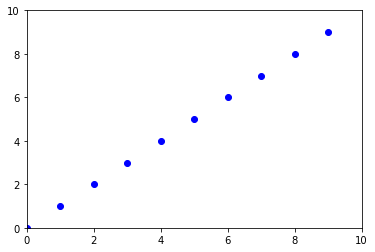

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

x = range(10)
y = range(10)
plt.plot(x, y, 'bo')

위 과정을 Animation으로 변환하고자 한다. `matplotlib` 라이브러리 내에 `FuncAnimation` 이라는 기능을 이용한다.

/tmp/ipykernel_39331/2618090197.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML # Jupyter에서 출력하기 위한 용도


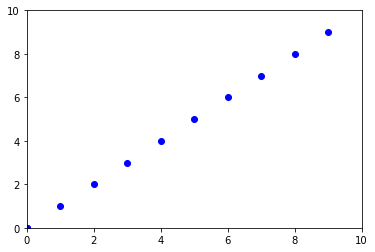

In [6]:
from matplotlib.animation import FuncAnimation
from IPython.core.display import display, HTML # Jupyter에서 출력하기 위한 용도

fig, ax = plt.subplots()
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

x = []
y = []
graph, = ax.plot(x, y, 'bo')


def update(frame):
    '''
    매 반복마다 프레임을 전달함.
    실질적으로 다음 애니메이션 프레임을 설정하는 callback 함수.
    '''
    x.append(frame[0])
    y.append(frame[1])
    
    graph.set_data(x,y)
    

animation = FuncAnimation(fig, update, frames=zip(range(10), range(10)))
video_tag = HTML(animation.to_html5_video())
#display(video_tag) # 이 부분을 주석 해제하면 영상이 출력됨

## 정적 map 데이터 출력해보기
map 데이터를 출력해본다. 데이터가 워낙 복잡하다보니 모든 특성을 표현하지 않고, 좌표정보 위주로 출력하는게 좋을 것 같다. 우선 하나의 시나리오에 존재하는 첫 번째 map feature를 출력해보자

In [7]:
def poly2postion(poly):
    x, y, z = [], [], []
    for point in poly:
        x.append(point.x)
        y.append(point.y)
        z.append(point.z)
    return x, y, z

In [8]:
def visualizationMap(ax, map_features):
    for feature in map_features:
        #print("****", feature.id)
        
        lane_x, lane_y, lane_z = poly2postion(feature.lane.polyline)
        ax.plot(lane_x, lane_y, '-', c='#d6d6d6', lw=3) # 도로부분이라서 연한 회색
        
        road_line_x, road_line_y, road_line_z = poly2postion(feature.road_line.polyline)
        ax.plot(road_line_x, road_line_y, '--', c='gray') # 차선이라서 일단 회색 대시 선
        
        road_edge_x, road_edge_y, road_edge_z = poly2postion(feature.road_edge.polyline)
        ax.plot(road_edge_x, road_edge_y, '-', c='black') # 엣지 부분은 검은 실선
        
        for point in [feature.stop_sign.position]:
            pass #ax.plot(point.x, point.y, marker='o', c='red', ms=10) # 데이터가 좀 이상함,,,
        
        crosswalk_x, crosswalk_y, crosswalk_z = poly2postion(feature.crosswalk.polygon)
        ax.plot(crosswalk_x, crosswalk_y, '-', c='#f1f289', lw=3)
        
        speed_bump_x, speed_bump_y, speed_bump_z = poly2postion(feature.speed_bump.polygon)
        ax.plot(speed_bump_x, speed_bump_y, '-', c='#fab6e6', lw=3)

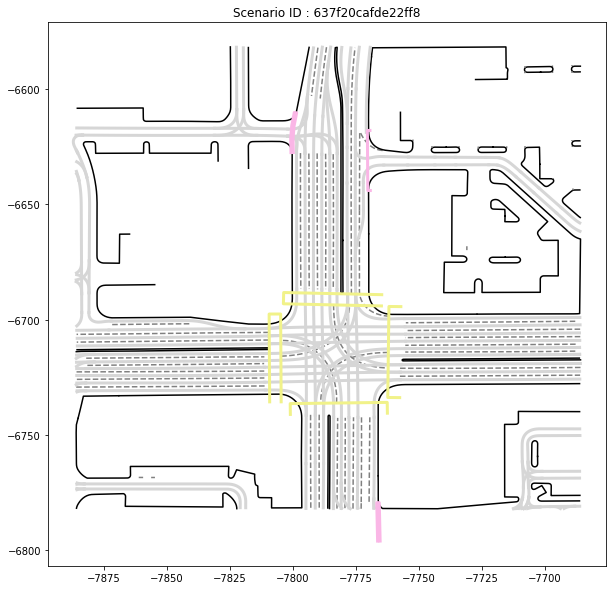

In [9]:
for data in dataset:
    proto_string = data.numpy()
    scenario = scenario_pb2.Scenario()
    scenario.ParseFromString(proto_string)

    break

fig, ax = plt.subplots(figsize=(10,10))
ax.title.set_text("Scenario ID : " + scenario.scenario_id)

visualizationMap(ax, scenario.map_features)

두 시나리오의 map 데이터를 출력해보았다.

여기서 알 수 있는 점은 데이터셋 내에 존재하는 수많은 시나리오들은 `시나리오 간 연관성을 가지고있지는 않다`는 것이다. 이 점은 정말 다행인 부분이다. 시나리오까지 얽혀있었다면 문제가 너무 복잡해졌을 것이다.

그러나 위 코드에는 두 가지 한계점이 존재한다.

- 세부 분류가 진행되지 않았다.

    - 위 코드는 map feature라고 불리는 데이터들의 좌표를 1차적인 분류(feature_data)만 진행한 것.
    - 때문에 더욱 정확한 map 데이터를 시각화 하기 위해서는 각 feture_data 내 세부 데이터까지 건드려야 한다  


- 좌표의 z 좌표를 고려하지 않았다.

    - 2차원 좌표계에 표현하다보니 z축이 고려되지 않았다.
    - 더욱 정확한 정보를 시각화하기 위해 3차원 공간 상의 그래프로 나타낼 필요가 있다.

위 두 가지 한계를 충분히 해결하지 않고 넘어가는 이유는 현재 시각화의 목적이 데이터셋의 전체적의 흐름을 파악하기 위함이기 때문이다. 추후 진행하면서 필요할 경우 수정할 계획이다.

## Agent 출력해보기

정적 Map 데이터의 일부 주요한 피쳐를 시각화했으니 그 위에 Agent를 출력해보자

In [10]:
for data in dataset:
    proto_string = data.numpy()
    scenario = scenario_pb2.Scenario()
    scenario.ParseFromString(proto_string)
    
    break

scenario.scenario_id

'637f20cafde22ff8'

In [11]:
def updateTracks(idx):
    mission_x, mission_y, mission_z = [], [], []
    state_x, state_y, state_z       = [], [], []
    for track in scenario.tracks:
        state = track.states[idx]
        if state.valid:
            if track.id in scenario.objects_of_interest:
                # 예측해야하는 객체
                mission_x.append(state.center_x)
                mission_y.append(state.center_y)
                mission_z.append(state.center_z)
            else:
                # 일반 객체
                state_x.append(state.center_x)
                state_y.append(state.center_y)
                state_z.append(state.center_z)
        else:
            pass #print("ERROR :: Invalid track state")
    ax.set_title("Scenario ID : " + scenario.scenario_id + " / Scene " + str(idx), fontsize=18)
    objs.set_data(state_x, state_y)
    mission.set_data(mission_x, mission_y)


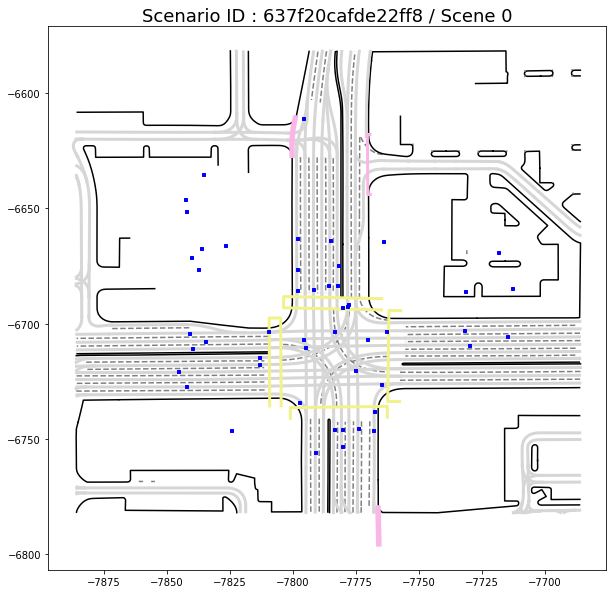

In [12]:
fig, ax = plt.subplots(figsize=(10,10))
ax.title.set_text("Scenario ID : " + scenario.scenario_id)

visualizationMap(ax, scenario.map_features)

# Agent 출력
objs,    = ax.plot([], [], 's', c='blue', ms=3)
mission, = ax.plot([], [], 's', c='red',  ms=3)

animation = FuncAnimation(fig, updateTracks, frames=range(len(scenario.timestamps_seconds)))
video_tag = HTML(animation.to_html5_video())
# display(video_tag) # 영상 출력 부분

모든 객체를 시간의 흐름에 따라 출력했다. 예측해야하는 객체를 명확하게 표현하면 더 좋을 것 예측할 객체가 존재하는 `6bdceecbf2416202 시나리오`를 시각화 하도록 아래와 같이 수정했다.

In [13]:
for data_no, data in enumerate(dataset):
    proto_string = data.numpy()
    scenario = scenario_pb2.Scenario()
    scenario.ParseFromString(proto_string)
    
    if len(scenario.objects_of_interest) == 0:
        # 예측해야 할 객체가 없는 시나리오는 그냥 패스
        continue
    else:
        break

scenario.scenario_id

'6bdceecbf2416202'

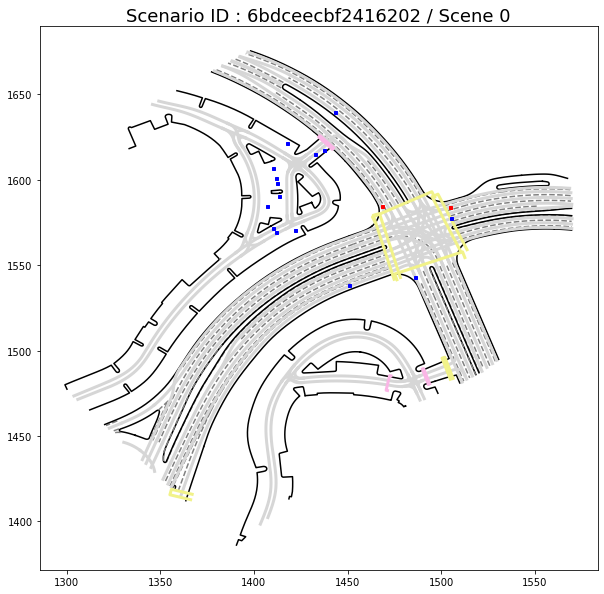

In [14]:
fig, ax = plt.subplots(figsize=(10,10))
ax.title.set_text("Scenario ID : " + scenario.scenario_id)

visualizationMap(ax, scenario.map_features)

# Agent 출력
objs,    = ax.plot([], [], 's', c='blue', ms=3)
mission, = ax.plot([], [], 's', c='red',  ms=3)

animation = FuncAnimation(fig, updateTracks, frames=range(len(scenario.timestamps_seconds)))
video_tag = HTML(animation.to_html5_video())
# display(video_tag) # 영상 출력 부분

이번에도 코드 상의 한계점은 명확하다. Object의 type과 속도 등의 `세부 데이터들을 고려하지 않았다는 점`. Agent의 종류에 따른 모양 변경과 같이 다른 세부 데이터들도 시각화할 필요가 있다.